In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [42]:
df = pd.read_csv('30_merged_dataset_v00_final.csv')

In [43]:
df.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [44]:
df.duplicated().sum()
#No duplicate rows found

0

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.shape


(1421, 13)

In [47]:
df.describe

<bound method NDFrame.describe of                                  Country  Year  Suicides number  \
0                                Albania  2000             54.0   
1                                Albania  2001            119.0   
2                                Albania  2002            133.0   
3                                Albania  2003            124.0   
4                                Albania  2004            146.0   
...                                  ...   ...              ...   
1416  Venezuela (Bolivarian Republic of)  2009            751.0   
1417  Venezuela (Bolivarian Republic of)  2010            775.0   
1418  Venezuela (Bolivarian Republic of)  2011            760.0   
1419  Venezuela (Bolivarian Republic of)  2012            731.0   
1420  Venezuela (Bolivarian Republic of)  2013            618.0   

      Life expectancy  Adult Mortality  Infant deaths  Alcohol  \
0                72.6             11.0              1     3.66   
1                73.6        

# Univariate Analysis of Suicide Numbers

In [48]:
dat = df["Income composition of resources"]

In [49]:
# We see that there are no null columns
dat.isna().sum()

0

In [50]:
dat.describe()

count    1421.000000
mean        0.748189
std         0.160380
min         0.000000
25%         0.695000
50%         0.773000
75%         0.852000
max         0.948000
Name: Income composition of resources, dtype: float64

In [51]:
# Finding IQR for Boxplots 
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)

IQR = Q3 - Q1

In [52]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('IQR:', IQR)
print('Q1:', Q1)
print('Q3:', Q3)

Lower Bound: 0.4594999999999999
Upper Bound: 1.0875
IQR: 0.15700000000000003
Q1: 0.695
Q3: 0.852


In [53]:
# Finding outliers
outliers = dat[(dat < lower_bound) | (dat > upper_bound)]
# There are many outliers
outliers

11      0.000
12      0.000
13      0.000
14      0.000
15      0.000
16      0.000
92      0.000
469     0.000
514     0.000
515     0.000
516     0.000
517     0.000
518     0.000
519     0.000
520     0.000
521     0.000
522     0.000
523     0.000
558     0.443
559     0.444
560     0.447
561     0.450
695     0.000
696     0.000
849     0.000
850     0.000
851     0.000
852     0.000
1099    0.000
1227    0.000
1228    0.000
1229    0.000
1230    0.000
1231    0.000
1327    0.000
1328    0.000
1329    0.000
1330    0.000
1331    0.000
1332    0.000
1333    0.000
1334    0.000
1335    0.000
1336    0.000
1337    0.000
1395    0.000
Name: Income composition of resources, dtype: float64

In [54]:
print("Number of outliers: ", outliers.shape[0])
print("Percentage of outliers: ", (outliers.shape[0]/dat.shape[0])*100)

Number of outliers:  46
Percentage of outliers:  3.2371569317382125


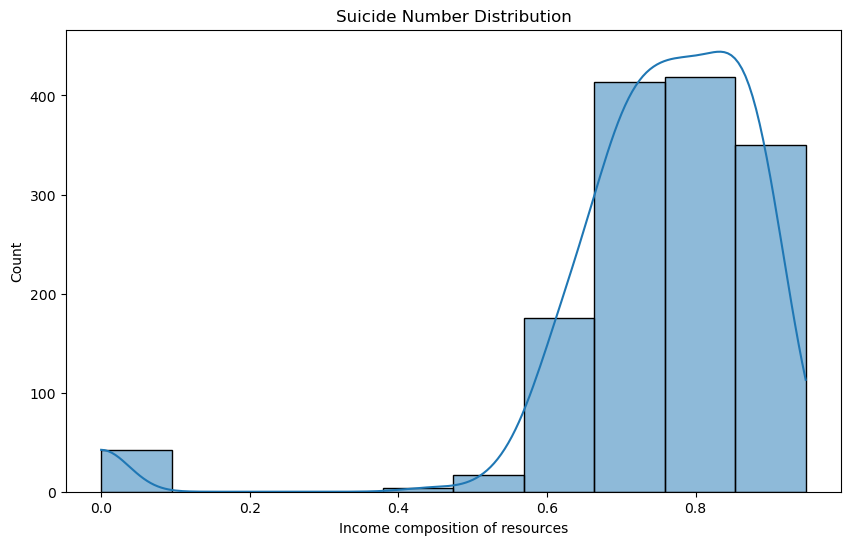

In [55]:
# Plotting the data

plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Suicide Number Distribution')
plt.show()


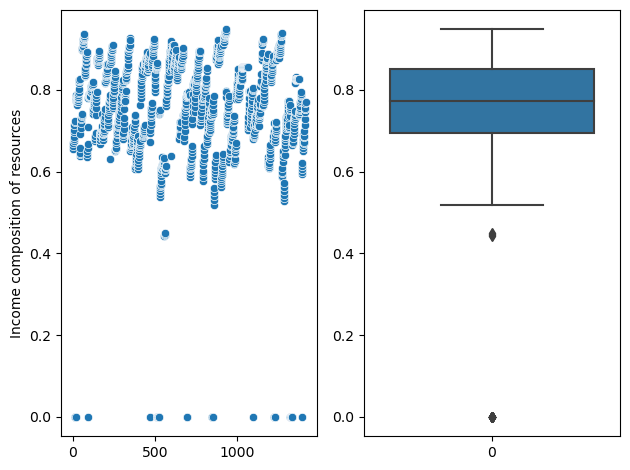

In [56]:
plt.subplot(1, 2, 1)
sns.scatterplot(dat)
plt.subplot(1, 2, 2)
sns.boxplot(dat)
plt.tight_layout()
plt.show()

In [57]:
# removing the outliers
dat = dat[(dat > lower_bound) & (dat < upper_bound)]
print(df.shape)

(1421, 13)


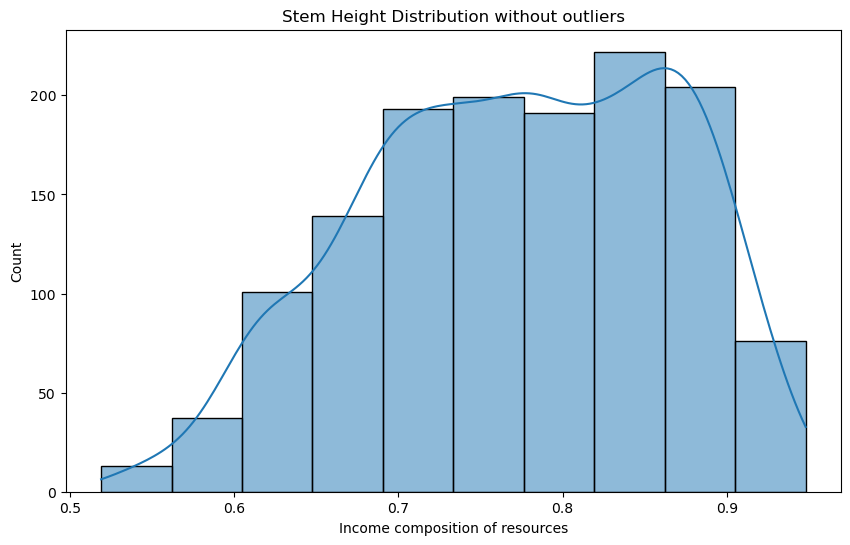

In [58]:
# Plotting the data

plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Stem Height Distribution without outliers')
plt.show()

# Inferences
    - The income composition of resources is rightly skewed.
    - The average income composition is 0.74 while the std is 0.16 which means the data is spread.
    - IQR is 0.157.
    

In [59]:
# Z-score method
z_scores = stats.zscore(dat)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print("Number of outliers: ", outliers.sum())
print("Number of outliers: ", np.count_nonzero(outliers))

Number of outliers:  0
Number of outliers:  0


<Axes: xlabel='Income composition of resources', ylabel='Count'>

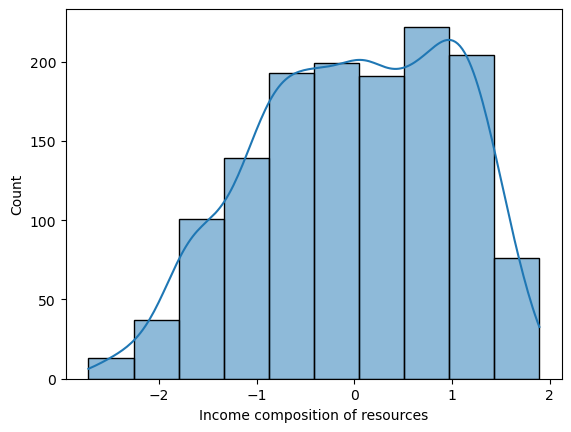

In [60]:
sns.histplot(z_scores, kde=True, bins=10)

# Bivariate Analysis of Suicide numbers and income compositions of resources (numerical/numerical)

In [61]:
df = df.loc[:, ['Income composition of resources', 'Suicides number']]

In [65]:
# Checking for duplicates and missing values
print(df.duplicated())
print(df.isna().sum())

df.describe()

0       False
1       False
2       False
3       False
4       False
        ...  
1416    False
1417    False
1418    False
1419    False
1420    False
Length: 1421, dtype: bool
Income composition of resources    0
Suicides number                    0
dtype: int64


,Income composition of resources,Suicides number
count,1421.000000,1421.000000
mean,0.748189,2629.177340
std,0.160380,6755.607644
min,0.000000,0.000000
25%,0.695000,85.000000
50%,0.773000,501.000000
75%,0.852000,1867.000000
max,0.948000,56958.000000


In [63]:
# Check for correlations
df.corr()

,Income composition of resources,Suicides number
Income composition of resources,1.00000,0.13313
Suicides number,0.13313,1.00000


In [67]:
# ANOVA testing
f_statistic, p_value = stats.f_oneway(df['Income composition of resources'], df['Suicides number'])
print('F statistic:', f_statistic)
print('P value:', p_value)

# p value is less than 0.05, so we can reject the null hypothesis that the two columns are independent.
# The two columns depend upon each other.  

F statistic: 215.1086086385827
P value: 5.292083684151042e-47


<Axes: xlabel='Suicides number', ylabel='Income composition of resources'>

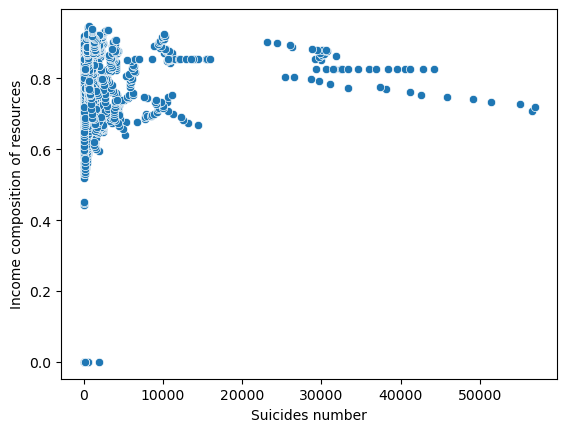

In [71]:
sns.scatterplot(x='Suicides number', y='Income composition of resources', data=df)

# Inferences
    - We can see two clusters are formed.
    - As the number of suicides increases (beyond 30,000), the "Income composition of resources" generally decreases.

# Multivarite analysis of Income composition of resources, Life Expectancy and Countries. (Numerical/Numerical/Categorical)

In [72]:
# Reloading the dataset
df = pd.read_csv('30_merged_dataset_v00_final.csv')

In [74]:
df.head()



,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [75]:
df = df.loc[:, ['Life expectancy', 'Income composition of resources', 'Country']]

In [76]:
df.head()

,Life expectancy,Income composition of resources,Country
0,72.6,0.656,Albania
1,73.6,0.662,Albania
2,73.3,0.670,Albania
3,72.8,0.674,Albania
4,73.0,0.681,Albania


In [77]:
df.isna().sum()
# No missing values found

Life expectancy                    0
Income composition of resources    0
Country                            0
dtype: int64

In [78]:
df.dtypes

Life expectancy                    float64
Income composition of resources    float64
Country                             object
dtype: object

In [80]:
#converting the country column to category
df['Country'] = df['Country'].astype('category')

In [84]:
number_of_countries = df['Country'].unique()
print(number_of_countries)
print('Number of countries:', len(number_of_countries))

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', ..., 'United Arab Emirates', 'United States of America', 'Uruguay', 'Uzbekistan', 'Venezuela (Bolivarian Republic of)']
Length: 106
Categories (106, object): ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', ..., 'United States of America', 'Uruguay', 'Uzbekistan', 'Venezuela (Bolivarian Republic of)']
Number of countries: 106


In [87]:
# Encoding the categorial variables
df['Country'] = df['Country'].apply(lambda x: np.where(number_of_countries == x)[0][0])
df['Country'].value_counts()

Country
67    16
84    16
28    16
30    16
86    16
      ..
97     2
52     2
13     2
44     1
17     1
Name: count, Length: 106, dtype: int64

C:\Users\Namay Rohatgi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


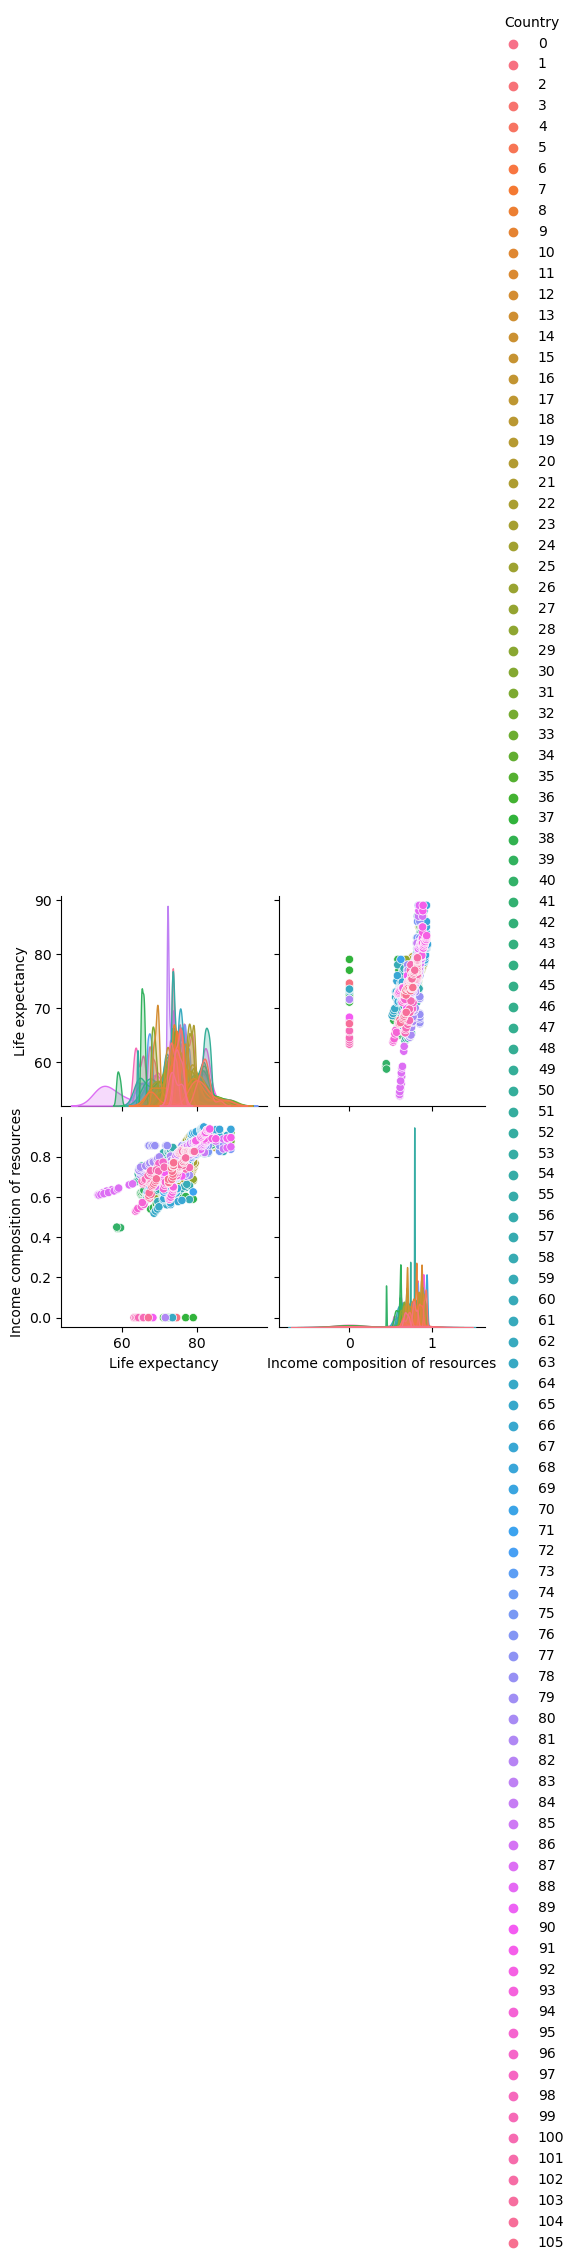

In [92]:
sns.pairplot(df, hue='Country')

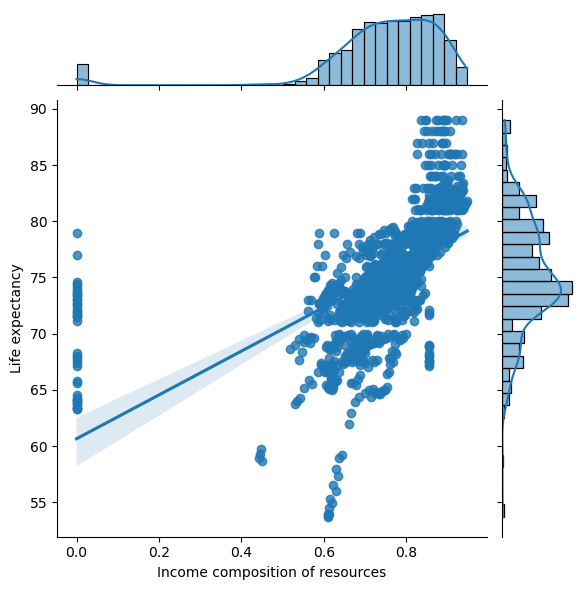

In [93]:
sns.jointplot(x='Income composition of resources', y='Life expectancy', data=df, kind='reg')

# Inferences
    - The life expectancy is more for people who have higher income composition of resources, irrespective of their country.